# Bank Customer Churn Prediction

Customer churn is a significant concern for businesses, particularly in competitive industries such as banking. High churn rates result in loss of revenue and increased costs for acquiring new customers. This project aims to predict customer churn using machine learning techniques, helping the business identify at-risk customers and take proactive measures to retain them.


## 1. Load Data
---

In [3]:
# Load data manipulation package
import numpy as np
import pandas as pd
import itertools

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load Statistics package
import statsmodels.api as sm

In [4]:
# Import dataset from csv file
data = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

data = data.copy()
data[data.select_dtypes(include=['object']).columns] = (
    data.select_dtypes(include=['object']).apply(label_encoder.fit_transform).astype(int))

# Table check
data.head().T

,0,1,2,3,4
customer_id,15634602.00,15647311.00,15619304.00,15701354.00,15737888.00
credit_score,619.00,608.00,502.00,699.00,850.00
country,0.00,2.00,0.00,0.00,2.00
gender,0.00,0.00,0.00,0.00,0.00
age,42.00,41.00,42.00,39.00,43.00
tenure,2.00,1.00,8.00,1.00,2.00
balance,0.00,83807.86,159660.80,0.00,125510.82
products_number,1.00,1.00,3.00,2.00,1.00
credit_card,1.00,0.00,1.00,0.00,1.00
active_member,1.00,1.00,0.00,0.00,1.00


In [5]:
# Check the data shape
data.shape

(10000, 12)

  - Our sample contains 12 variables from 10,000 customers.
    - 1 response variable, `churn`,
    - and 11 potential predictors.

Churn is a property of users. Check for the duplicate user in our sample using column `customer_id`.

In [6]:
# Find the sum/total of duplicated user IDs.
data['customer_id'].duplicated().sum()

0

In [7]:
#drop the customer_id

data = data.drop(columns=['customer_id'], axis=1)

# Information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int32  
 2   gender            10000 non-null  int32  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


Before modeling, make sure you split the data first for model validation.

In the classification case, check the proportion of response variable first to decide the splitting strategy.

In [8]:
# Check the proportion of response variable
data['churn'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

The proportion of the response variable, `churn`, is not quite balanced (in a ratio of 79:21).

To get the same ratio in training & testing set, define a stratified splitting based on the response variable, `churn`.

## 2. Sample Splitting
---

In [9]:
response_variable = 'churn'

# Split response and predictors
y = data[response_variable]
X = data.drop(columns=[response_variable], axis=1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (10000,)
X shape : (10000, 10)


Next, split the training and testing set from each predictors (X) and response (y).
- Set `stratify = y` for splitting the sample with stratify, based on the proportion of response y.
- Set `test_size = 0.3` for holding 30% of the sample as a testing set.
- Set `random_state = 47` for reproducibility.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 47)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (7000, 10)
y train shape : (7000,)
X test shape  : (3000, 10)
y test shape  : (3000,)


In [11]:
y_train.value_counts(normalize=True)

0    0.796286
1    0.203714
Name: churn, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.796333
1    0.203667
Name: churn, dtype: float64

## 3. Exploratory Data Analysis
---

- To make a model that predicts well on unseen data, we must prevent leakage of test set information.
- Thus, we only explore on **training set**.

In [13]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train), axis=1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head().T

Train data shape: (7000, 11)


,5452,7707,1954,9152,310
credit_score,558.00,848.00,624.00,708.00,652.00
country,0.00,2.00,2.00,1.00,0.00
gender,0.00,1.00,1.00,0.00,0.00
age,45.00,35.00,51.00,23.00,80.00
tenure,1.00,5.00,5.00,4.00,4.00
balance,153697.53,120046.74,174397.21,71433.08,0.00
products_number,2.00,2.00,2.00,1.00,2.00
credit_card,0.00,1.00,1.00,1.00,1.00
active_member,0.00,0.00,1.00,0.00,1.00
estimated_salary,89891.40,84710.65,172372.63,103697.57,188603.07


In [14]:
# Check for missing values
data_train.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Predictor 1: gender
---

In [15]:
# Describe proportion of 'gender'
data_train['gender'].value_counts(normalize=True)

1    0.544143
0    0.455857
Name: gender, dtype: float64

From here, we know that our sample ratio of gender is 55:45.

<AxesSubplot:xlabel='gender', ylabel='count'>

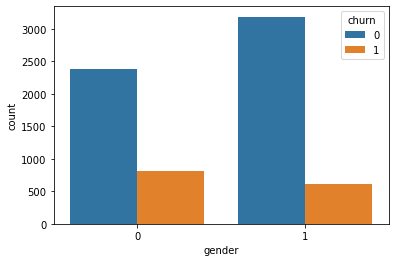

In [16]:
# Describe proportion of churn by 'is_tv_subscriber'
sns.countplot(data = data_train,
              x = 'gender',
              hue = 'churn')

Kita dapat melihat bahwa customer laki-laki memiliki presentase churn yang lebih rendah daripada customer perempuan, namun memiliki presentase retensi yang lebih tinggi daripada customer perempuan

In [17]:
# Frequency of churn by 'gender'
churn_by_gender = pd.crosstab(data_train['gender'],
                                     data_train['churn'],
                                     margins = False)
churn_by_gender

churn,0,1
gender,,
0,2385,806
1,3189,620


In [18]:
# Odds of churning from Female
odds_Female = churn_by_gender[1][0]/churn_by_gender[0][0]

# Odds of churning from Male
odds_Male = churn_by_gender[1][1]/churn_by_gender[0][1]

print("Odds of churning from:")
print(f"Male     = {odds_Male:.2f}")
print(f"Female = {odds_Female:.2f}")

Odds of churning from:
Male     = 0.19
Female = 0.34


In [19]:
# Let's check from the independence test

# Import the libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Test whether churn is independent of TV subscriber
stats.chi2_contingency(churn_by_gender)

# Result of independence test
result = stats.chi2_contingency(churn_by_gender)

# Extract the test result
stat = result[0]
pval = result[1]

print(f"Chi-stat   : {stat:.4f}")
print(f"P-value    : {pval:.4f}")

Chi-stat   : 85.7904
P-value    : 0.0000


In [20]:
# Create a function of independence test
def independence_test(predictor_label, alpha=0.05):
    """
    Funtion to perform the independence test.

    Parameters
    ----------
    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data_train[predictor_label],
                           data_train['churn'],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Churn and {predictor_label} is not independent with P-val={pval}.")
    else:
        print(f"Churn and {predictor_label} is independent with P-val={pval}.")

In [21]:
# Perform the independence test
independence_test('gender')

Churn and gender is not independent with P-val=2.000581868539255e-20.


In [22]:
for column in data.columns:
    if column != 'churn':  # Skip target column
        independence_test(column)

Churn and credit_score is independent with P-val=0.2788073328698837.
Churn and country is not independent with P-val=1.352383261229898e-41.
Churn and gender is not independent with P-val=2.000581868539255e-20.
Churn and age is not independent with P-val=1.1508968994090899e-197.
Churn and tenure is independent with P-val=0.6290344117810935.
Churn and balance is not independent with P-val=2.969339193866436e-11.
Churn and products_number is not independent with P-val=6.647852482242565e-229.
Churn and credit_card is independent with P-val=0.28023025654215206.
Churn and active_member is not independent with P-val=1.9269382028663912e-39.
Churn and estimated_salary is independent with P-val=0.4910090165706.


**Summary**

**Business Insight:**
- Probabilitas pelanggan berhenti (churn) dan potensi prediktor berupa jenis kelamin tidak bersifat independen, di mana peluang lebih tinggi untuk berhenti berasal dari pelanggan perempuan.
  - Oleh karena itu, jenis kelamin mungkin memiliki nilai tambahan bagi pelanggan kita dalam upaya untuk mempertahankan mereka.

In [23]:
# Checking missing value
data_train['gender'].isnull().any()

False

**Pre-processing Plan:**
- We don't have outlier and missing values from `gender` variable.

### Predictor 2: country
---

In [24]:
# Describe proportion of 'is_movie_package_subscriber'
data_train['country'].value_counts(normalize=True)

0    0.504286
1    0.250286
2    0.245429
Name: country, dtype: float64

<AxesSubplot:xlabel='country', ylabel='count'>

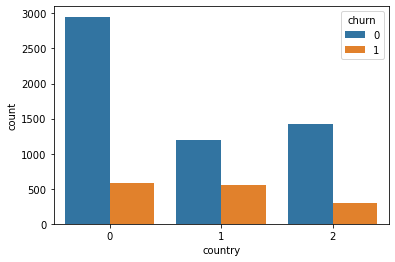

In [25]:
# Describe proportion of churn by 'is_movie_package_subscriber'
sns.countplot(data = data_train,
              x = 'country',
              hue = 'churn')

Kita dapat melihat bahwa customer dari negara Perancis mendominasi dari tingkat retensi, sedangkan customer dari negara Germany dan Spain hampir imbang. Presentase Churn sebenernya tidak memiliki tingkat perbedan yang signifikan, customer dari negara Perancis dan Germany memiliki tingkat churn yang paling tinggi disusul customer dari negara Spain.

0 france
1 germany
2 spain

### Predictor 3: credit score
---

In [26]:
# Descriptive statistics of 'credit_score'
data_train['credit_score'].describe()

count    7000.000000
mean      650.613429
std        96.360267
min       350.000000
25%       584.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: credit_score, dtype: float64

In [27]:
# Descriptive of credit_score by response churn
data_train['credit_score'].groupby(data_train['churn']).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5574.0,652.458378,95.780163,408.0,586.0,655.0,718.0,850.0
1,1426.0,643.401823,98.297360,350.0,578.0,644.0,713.0,850.0


<AxesSubplot:xlabel='churn', ylabel='credit_score'>

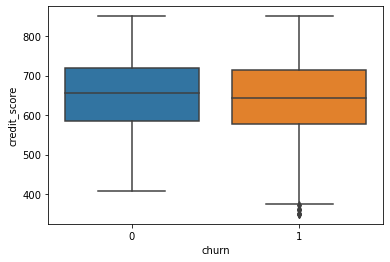

In [28]:
# Boxplot of credit_score by response churn
sns.boxplot(data = data_train,
            x = 'churn',
            y = 'credit_score')

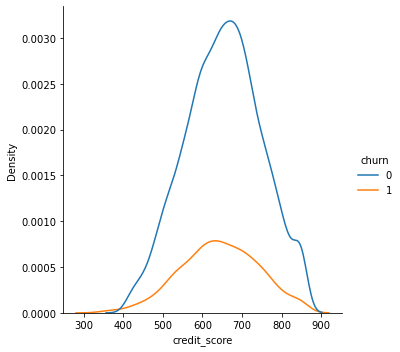

In [29]:
# Distribution plot of credit_score by response churn
sns.displot(data = data_train,
            x = 'credit_score',
            hue = 'churn',
            kind ='kde')

Pelanggan yang berhenti (churned) dan yang tetap bertahan (retained) tampaknya berasal dari populasi yang heterogen, di mana rata-rata nilai credit score antara churn dan retain berbeda cukup jauh.

Karena kita belum mendapatkan informasi lebih lanjut tentang variabel ini, kita mengasumsikan bahwa nilai tinggi dari rata-rata tagihan bukan merupakan outlier.

In [30]:
# Checking missing value
data_train['credit_score'].isnull().any()

False

### Predictor 4: age
---

In [31]:
# Descriptive statistics of subscription_age
data_train['age'].describe()

count    7000.000000
mean       38.946286
std        10.437807
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

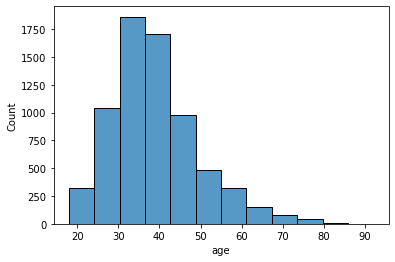

In [32]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'age',
             bins = 12)

In [33]:
# Descriptive of age by response churn
data_train['age'].groupby(data_train['churn']).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5574.0,37.408504,10.058084,18.0,31.0,36.0,41.0,92.0
1,1426.0,44.957223,9.698196,18.0,39.0,45.0,51.0,73.0


<AxesSubplot:xlabel='churn', ylabel='age'>

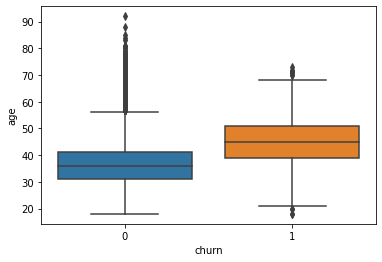

In [34]:
# Boxplot of age by response churn
sns.boxplot(data = data_train,
            x = 'churn',
            y = 'age')

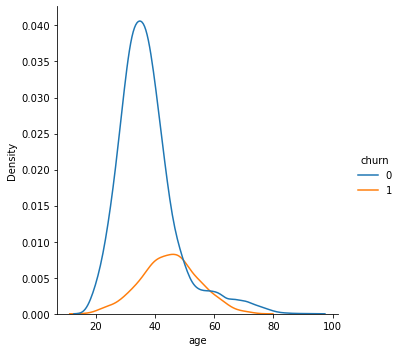

In [35]:
# Distribution plot of age by response churn
sns.displot(data = data_train,
            x = 'age',
            hue = 'churn',
            kind = 'kde')

Ringkasan

- Rata-rata customer berumur 20 sampai 40 tahun
- Pelanggan yang retained didominasi oleh mereka yang berumur rata-rata 35 tahun, dan terdapat ketimpangan antara presentase customer churn dan retain.
- Kita tidak dapat secara eksplisit melihat karakteristik pelanggan yang berhenti berdasarkan usia mereka. 

Wawasan Bisnis:

- Tim Operasi dapat memeriksa karakteristik pelanggan dengan usia antara 30-40 tahun, karena peluang untuk mempertahankan pelanggan dalam kelompok ini tampaknya lebih tinggi dibandingkan kelompok lainnya.

### Predictor 5: tenure
---

<AxesSubplot:xlabel='churn', ylabel='tenure'>

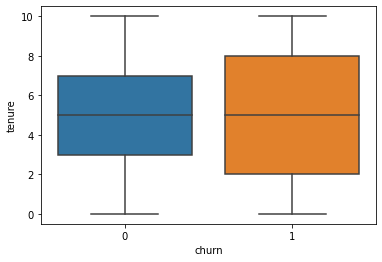

In [36]:
# Boxplot of subscription_age by response churn
sns.boxplot(data = data_train,
            x = 'churn',
            y = 'tenure')

- Pelanggan yang churn (1) cenderung memiliki masa langganan (tenure) yang lebih rendah dibandingkan pelanggan yang tidak churn (0).
- Median tenure pelanggan churn lebih rendah daripada median tenure pelanggan non-churn.
- Pelanggan non-churn memiliki distribusi tenure yang lebih menyebar, dengan beberapa pelanggan memiliki tenure yang jauh lebih tinggi.

Kesimpulan:
Ada hubungan antara lama masa langganan dan kemungkinan pelanggan churn. Pelanggan dengan masa langganan lebih pendek lebih cenderung churn.



<AxesSubplot:xlabel='tenure', ylabel='Count'>

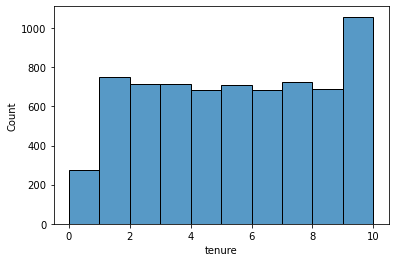

In [37]:
# Distribution plot of subscription_age
sns.histplot(data = data_train,
             x = 'tenure',
             bins = 10)

- Mayoritas pelanggan memiliki tenure yang terdistribusi cukup merata, tetapi ada lonjakan signifikan pada tenure tertinggi (10 tahun). Ini menunjukkan bahwa ada sejumlah pelanggan yang sangat loyal dengan masa langganan maksimum.

Kesimpulan:
Sebagian besar pelanggan tersebar di seluruh periode tenure, tetapi ada akumulasi pelanggan pada masa langganan maksimum (10 tahun), menunjukkan adanya kelompok pelanggan loyal yang bertahan lama.


summary
- Pelanggan dengan masa langganan lebih pendek lebih rentan churn, sementara pelanggan dengan masa langganan lebih lama (terutama di puncak tenure) lebih cenderung tetap loyal.
- Strategi retensi perlu difokuskan pada pelanggan dengan tenure rendah untuk mengurangi churn.

### Predictor 6: balance
---

<AxesSubplot:xlabel='balance', ylabel='Count'>

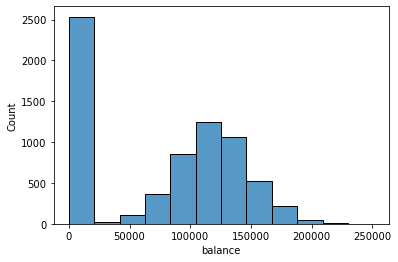

In [38]:
# Distribution plot of balance
sns.histplot(data = data_train,
             x = 'balance',
             bins = 12)

In [39]:
#Melakukan penyesuaian agar outlier hilang

q = data_train['balance'].quantile(0.15)
data_train = data_train[data_train['balance']>q]

<AxesSubplot:xlabel='balance', ylabel='Count'>

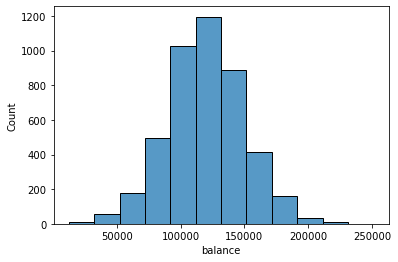

In [40]:
sns.histplot(data = data_train,
             x = 'balance',
             bins = 12)

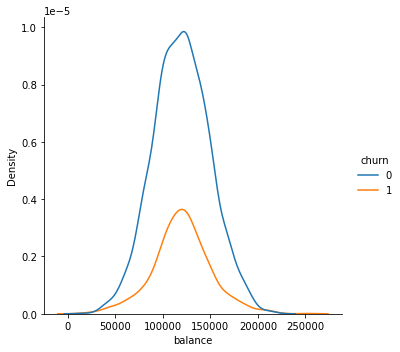

In [41]:
# Distribution plot of balance by response churn
sns.displot(data = data_train,
            x = 'balance',
            hue = 'churn',
            kind = 'kde')

Pelanggan yang berhenti (churned) dan yang tetap bertahan (retained) tampaknya berasal dari populasi yang heterogen, di mana rata-rata balance antara churn dan retain berbeda cukup jauh.

Karena kita belum mendapatkan informasi lebih lanjut tentang variabel ini, kita mengasumsikan bahwa nilai tinggi dari rata-rata balance bukan merupakan outlier.

### Predictor 7: product_number
---

<AxesSubplot:xlabel='products_number', ylabel='count'>

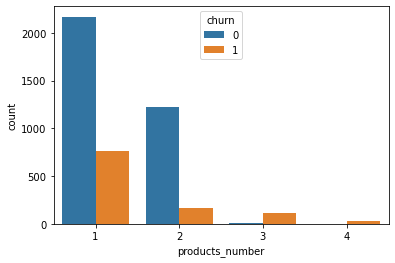

In [42]:
sns.countplot(data = data_train,
              x = 'products_number',
              hue = 'churn')

In [43]:
data.products_number.value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [44]:
churn_rate = data_train.groupby('products_number')['churn'].mean()
print(churn_rate)

products_number
1    0.259221
2    0.122126
3    0.950000
4    1.000000
Name: churn, dtype: float64


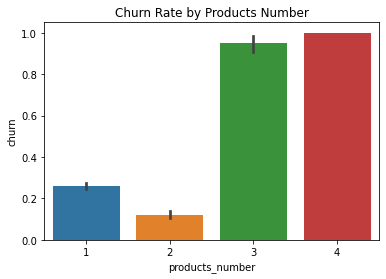

In [45]:
sns.barplot(data=data_train, x='products_number', y='churn')
plt.title('Churn Rate by Products Number')
plt.show()

- Pelanggan dengan 3 atau 4 produk kemungkinan merasa kurang puas atau mengalami kesulitan dengan layanan/produk tambahan. Bisa jadi produk-produk tersebut tidak relevan atau terlalu kompleks untuk pelanggan tertentu.

- Pelanggan dengan 3 dan 4 produk mungkin adalah segmen khusus (misalnya, pelanggan premium atau korporat). Tingginya churn bisa mengindikasikan perlunya pendekatan yang berbeda untuk mendukung segmen ini.

summary:
- Tingkat churn yang sangat tinggi untuk pelanggan dengan 3 dan 4 produk adalah masalah serius yang memerlukan perhatian. Analisis lebih lanjut diperlukan untuk memahami mengapa hal ini terjadi, tetapi langkah proaktif untuk mempertahankan pelanggan di segmen tersebut harus segera dilakukan.

### Predictor 8: credit card
---

In [46]:
# Describe proportion of 'credit_card'
data_train['credit_card'].value_counts(normalize=True)

1    0.693754
0    0.306246
Name: credit_card, dtype: float64

<AxesSubplot:xlabel='credit_card', ylabel='count'>

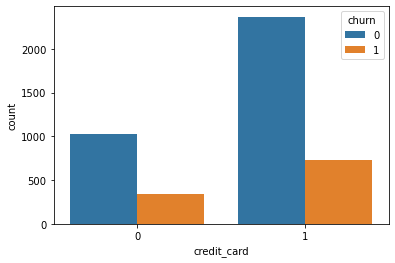

In [47]:
# Describe proportion of churn by 'credit_card'
sns.countplot(data = data_train,
              x = 'credit_card',
              hue = 'churn')

In [48]:
# Perform the independence test
independence_test('credit_card')

Churn and credit_card is independent with P-val=0.5521610859220868.


### Pelanggan tanpa kartu kredit (`credit_card = 0`):
- **Retain**: 1000 pelanggan  
- **Churn**: 350 pelanggan  
  
  Proportion retain = 1000/(1000 + 350) ≈ 74.1
   
  Proportion churn = 350/(1000 + 350) ≈ 25.9
  

### Pelanggan dengan kartu kredit (`credit_card = 1`):
- **Retain**: 2500 pelanggan  
- **Churn**: 750 pelanggan  

  Proportion retain} = 2500/(2500 + 750) ≈ 76.9%

  Proportion churn} = 750/(2500 + 750) ≈ 23.1%

- Pelanggan dengan Kartu Kredit Memiliki Retensi Sedikit Lebih Tinggi. Pelanggan dengan kartu kredit memiliki churn rate yang lebih rendah (23.1%) dibandingkan pelanggan tanpa kartu kredit (25.9%). Dengan kata lain, pelanggan dengan kartu kredit lebih cenderung bertahan.

- Efek Kartu Kredit Terhadap Churn Tidak Signifikan. Meskipun pelanggan dengan kartu kredit memiliki churn rate yang lebih rendah, perbedaannya tidak terlalu signifikan (25.9% vs 23.1%). Artinya, faktor kartu kredit bukan satu-satunya penyebab utama pelanggan bertahan atau churn.

summary:

Pelanggan dengan kartu kredit memiliki tingkat retensi yang sedikit lebih tinggi dibandingkan pelanggan tanpa kartu kredit. Namun, kartu kredit bukan satu-satunya faktor yang memengaruhi churn, sehingga perusahaan perlu mengeksplorasi faktor lain untuk mengurangi churn secara keseluruhan.

### Predictor 9: active member
---

In [49]:
# Describe proportion of 'active_member'
data_train['active_member'].value_counts(normalize=True)

1    0.51332
0    0.48668
Name: active_member, dtype: float64

<AxesSubplot:xlabel='active_member', ylabel='count'>

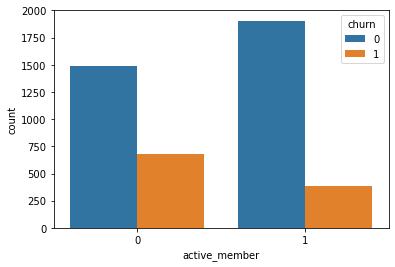

In [50]:
# Describe proportion of churn by 'credit_card'
sns.countplot(data = data_train,
              x = 'active_member',
              hue = 'churn')

### Pelanggan member non-aktif (`active_member = 0`):
- **Retain**: 1500 pelanggan  
- **Churn**: 700 pelanggan  
  
  Proportion retain = 1500/(700+1500) ≈ 68.2%
   
  Proportion churn = 700/(700+1500) ≈ 31.8%
  

### Pelanggan member aktif (`active_member = 1`):
- **Retain**: 1900 pelanggan  
- **Churn**: 400 pelanggan  

  Proportion retain = 1900/(400+1900) ≈ 82.6%

  Proportion churn = 400/(400+1900) ≈ 17.4%
  

Kesimpulan:
- Pelanggan Aktif Memiliki Churn Rate Lebih Rendah:

Pelanggan yang aktif (active_member = 1) memiliki churn rate yang jauh lebih rendah (17.4%) dibandingkan pelanggan non-aktif (31.8%).
Ini menunjukkan bahwa status aktif pelanggan sangat berhubungan dengan retensi.

- Pelanggan Non-Aktif Lebih Rentan Churn:

Pelanggan non-aktif (active_member = 0) memiliki kemungkinan churn hampir dua kali lipat dibandingkan pelanggan aktif (31.8% vs. 17.4%).
Hal ini dapat mengindikasikan bahwa keterlibatan pelanggan (aktivitas) sangat penting untuk mengurangi churn

### Predictor 10: estimated salary
---

In [51]:
# Descriptive statistics of 'estimated_salary'
data_train['estimated_salary'].describe()

count      4467.000000
mean     100591.382754
std       57512.093989
min          91.750000
25%       51446.105000
50%      101139.300000
75%      149259.710000
max      199970.740000
Name: estimated_salary, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

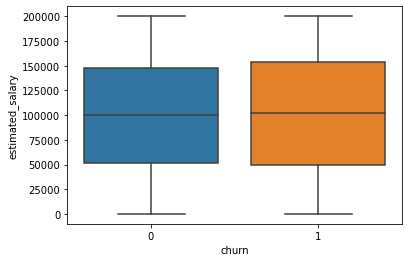

In [52]:
# Boxplot of estimated_salary by response churn
sns.boxplot(data = data_train,
            x = 'churn',
            y = 'estimated_salary')

- Distribusi Estimated Salary Mirip untuk Kedua Kategori: Tidak ada perbedaan signifikan dalam distribusi estimated_salary antara pelanggan yang churn (churn = 1) dan yang tidak churn (churn = 0).
- Tidak Ada Korelasi Kuat antara Estimated Salary dan Churn: Karena distribusi statistik (kuartil, median, minimum, maksimum) hampir identik, hal ini menunjukkan bahwa estimated_salary mungkin tidak menjadi faktor penting dalam menentukan apakah pelanggan akan churn atau tidak.

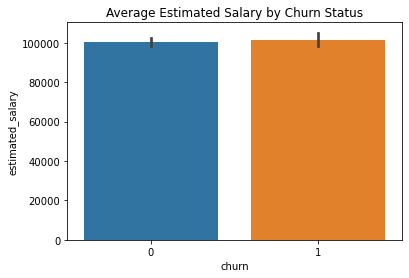

In [53]:
sns.barplot(data=data_train, x='churn', y='estimated_salary')
plt.title('Average Estimated Salary by Churn Status')
plt.show()

- Perbedaan yang Tidak Signifikan: Perbedaan rata-rata estimated_salary antara pelanggan churn dan tidak churn sangat kecil. Hal ini menunjukkan bahwa estimated_salary mungkin bukan faktor yang signifikan dalam memengaruhi keputusan pelanggan untuk churn.
- Hubungan Lemah dengan Churn: Jika estimated_salary digunakan sebagai variabel prediktor dalam model churn, pengaruhnya kemungkinan kecil karena rata-rata antara kedua kelompok hampir sama.

## 4. Preprocessing

In [54]:
# Checking missing value
data_train.isnull().any()

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [55]:
X_train.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
dtype: int64

## 5. Model Selection

Until now, we already:
1. Split the training and testing set.
  - Therefore, we have `X_train` and `y_train` from training set and `X_test` and `y_test` from testing set.
2. Perform EDA on training set.
3. Pre-processing missing values on `X_train`.
  - Therefore, we got `X_train_clean` with no missing values.

From there, we have 9 potential predictors in `X_train_clean` to predict customer churn.

Here we will perform variable selection to decide which predictor variables give the optimum model estimation fit and the optimum predictive performance.

We call that optimum model as the best model from the variable selection.

- We will use the **Forward Selection** procedure since we have relatively many predictors.
- We use the **AIC** value to choose the best model, in which the model with the smallest AIC is the best model.
- To find the valid AIC value from each possible model, we use **5-Fold Cross-Validation** to calculate the AIC score.

In [56]:
X_train_clean = X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 5452 to 1544
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      7000 non-null   int64  
 1   country           7000 non-null   int32  
 2   gender            7000 non-null   int32  
 3   age               7000 non-null   int64  
 4   tenure            7000 non-null   int64  
 5   balance           7000 non-null   float64
 6   products_number   7000 non-null   int64  
 7   credit_card       7000 non-null   int64  
 8   active_member     7000 non-null   int64  
 9   estimated_salary  7000 non-null   float64
dtypes: float64(2), int32(2), int64(6)
memory usage: 804.9 KB


### Load Functions for Model Selection
---

- AIC, KFold, and Forward Selection

In [57]:
def AIC(y_true, y_pred, p):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    y_true : {array-like} of shape (n_sample, )
        Actual value of response variable.

    y_pred : {array-like} of shape (n_sample, 1)
        The success probability of X.

    p : int
        Number of parameters in model.

    Returns
    -------
    aic : float
        AIC value.
    """
    # Find the average log likelihood value
    llf = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

    # AIC value is sensitive to number of parameters
    # The average log likelihood represent value for 1 unit observation
    # AIC from average llf is not comparable
    # Multiply llf by n_sample=173 to make its AIC comparable
    llf *= data_train.shape[0]

    # Calculate AIC
    aic = -2 * (llf - p)

    return aic


In [58]:
def kfold_split(X, k=5, random_state=42):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    k : int, default = 5
        Number of folds.

    random_state : int
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    train_ind_list : list
        Contains data index of train set.

    valid_ind_list : list
        Contains data index of validation set.
    """
    # Extract sample size
    n_samples, _ = X.shape

    # Set random state
    np.random.seed(random_state)

    # # Randomize index
    random_ind = np.random.choice(n_samples,
                                  size = n_samples,
                                  replace = False)

    # Calculate size of each fold
    fold_sizes = np.ones(k, dtype=int) * (n_samples//k)
    fold_sizes[:n_samples%k] += 1

    # Define initial list for each train and valid index
    train_ind_list = []
    valid_ind_list = []

    # Split sample
    current_ind = 0
    for size in fold_sizes:
        # Define index
        start_ind = current_ind
        end_ind = current_ind + size

        # Slice valid set
        # One fold for valid set, the remaining for train set
        valid_ind = random_ind[start_ind:end_ind]
        train_ind = np.concatenate((random_ind[:start_ind],
                                    random_ind[end_ind:]))

        # Update current index
        current_ind = end_ind

        # Append train and valid index in list
        train_ind_list.append(train_ind)
        valid_ind_list.append(valid_ind)

    return train_ind_list, valid_ind_list


In [59]:
def cross_validate(X, y, method, cv, random_state=42):
    """
    Function to evaluate AIC by cross-validation method.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictors.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    method : cross-validation splitter
        Cross-validation method.

    cv : int
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    score : float
        The average AIC score.
    """
    # Split train and valid set based on CV method
    if method == "validation_set":
        train_ind_list, valid_ind_list = validation_set_split(X = X,
                                                              random_state = random_state)
    elif method == "loocv":
        train_ind_list, valid_ind_list = loocv_split(X = X)
    elif method == "kfold":
        train_ind_list, valid_ind_list = kfold_split(X = X,
                                                     k = cv,
                                                     random_state = random_state)

    # Define the number of train sets
    n_split = len(train_ind_list)

    # Initialize AIC score list for each valid set
    score_list = []

    for i in range(n_split):
        # Extract data from index
        X_train = X[train_ind_list[i]]
        y_train = y[train_ind_list[i]]
        X_valid = X[valid_ind_list[i]]
        y_valid = y[valid_ind_list[i]]

        # Add constant
        X_train = sm.add_constant(X_train, has_constant="add")
        X_valid = sm.add_constant(X_valid, has_constant="add")

        # Fitting model
        model = sm.Logit(y_train, X_train)
        results = model.fit(disp=False)

        # Calculate success probability
        y_pred_train = results.predict(X_train)
        y_pred_valid = results.predict(X_valid)

        # Calculate AIC
        aic_train = AIC(y_true = y_train,
                        y_pred = y_pred_train,
                        p = X_train.shape[1])
        aic_valid = AIC(y_true = y_valid,
                        y_pred = y_pred_valid,
                        p = X_train.shape[1])

        # Append AIC score in list
        score_list.append(aic_valid)

    # Calculate CV Score
    score = np.mean(score_list)

    return score


In [60]:
def forward(X, y, predictors, method, cv=5, random_state=42):
    """
    Function to perform best subset selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
        Index of predictors

    method : cross-validation splitter
        Cross-validation method.

    cv : int, default=5
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
        Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
        Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Cross validate to get CV Score
        score_ = cross_validate(X = X_,
                                y = y_,
                                method = method,
                                cv = cv,
                                random_state = random_state)

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                            "AIC": score_list})

    # Choose the best model
    best_model = models.loc[models["AIC"].argmin()]

    return models, best_model

### Forward Selection Procedure
---

We are ready to perform the Forward Selection procedure.

- Begin with fitting the null model.
- Then perform the Forward Selection procedure by adding one predictor that make the smallest AIC score, one-at-a-time.
- Therefore, from `X_train_clean` containing 10 predictors, we will have 10 best models from each possible number of predictors in model.

In [61]:
# Convert dataframe to numpy
X_train_clean = X_train_clean.to_numpy()
y_train = y_train.to_numpy()

# Validate
print('X_train shape:', X_train_clean.shape)
print('y_train shape:', y_train.shape)

X_train shape: (7000, 10)
y_train shape: (7000,)


In [62]:
# Fit null model
predictor = []
score_ = cross_validate(X = X_train_clean[:, predictor],
                        y = y_train,
                        method = 'kfold',
                        cv = 5,
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "AIC": [score_]})

forward_models

,Predictors,AIC
0,[],4520.904794


In [63]:
# Define list of predictors
predictors = []
n_predictors = X_train_clean.shape[1]

# Perform forward selection procedure for k=1,...,5 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train_clean,
                            y = y_train,
                            predictors = predictors,
                            method = "kfold",
                            cv = 5,
                            random_state = 42)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model["Predictors"]

In [64]:
# Print the best model of each k predictors
forward_models

,Predictors,AIC
0,[],4520.904794
1,[3],4170.241803
2,"[3, 8]",3992.516831
3,"[3, 8, 5]",3947.777727
4,"[3, 8, 5, 2]",3902.350312
5,"[3, 8, 5, 2, 0]",3899.269470
6,"[3, 8, 5, 2, 0, 1]",3900.006678
7,"[3, 8, 5, 2, 0, 1, 6]",3902.628516
8,"[3, 8, 5, 2, 0, 1, 6, 9]",3905.829082
9,"[3, 8, 5, 2, 0, 1, 6, 9, 7]",3909.035446


Next, find the best model with the smallest AIC score.

In [65]:
# Find the best AIC score
best_idx = forward_models['AIC'].argmin()
best_AIC = forward_models['AIC'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# print
print('Best index            :', best_idx)
print('Best AIC              :', best_AIC)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(X_train.columns[best_predictors].tolist())

Best index            : 5
Best AIC              : 3899.2694697516395
Best predictors (idx) : [3, 8, 5, 2, 0]
Best predictors       :
['age', 'active_member', 'balance', 'gender', 'credit_score']


**Refit** the best model on whole `X_train_clean` data.

In [66]:
# Define X with best predictors
X_train_best = X_train_clean[:, best_predictors]

# Fit best model
X_train_best = sm.add_constant(X_train_best)
best_model = sm.Logit(y_train, X_train_best)
best_model_result = best_model.fit()

print(best_model_result.summary())

Optimization terminated successfully.
         Current function value: 0.433660
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6994
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                  0.1421
Time:                        19:49:25   Log-Likelihood:                -3035.6
converged:                       True   LL-Null:                       -3538.6
Covariance Type:            nonrobust   LLR p-value:                3.208e-215
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4268      0.255    -13.442      0.000      -3.926      -2.927
x1             0.0753      0.

Check the AIC from the best model that fitted on `X_train_best`.

In [67]:
# Extract the AIC
best_model_result.aic

6083.242035997263

Extract the best model' parameter estimates.

In [68]:
best_model_params = ['constant'] + X_train.columns[best_predictors].tolist()
best_model_summary = pd.DataFrame({
                                    'weights': best_model_result.params,
                                    'OR': np.exp(best_model_result.params)
                                  },
                                  index = best_model_params)

best_model_summary

,weights,OR
constant,-3.426826,0.032490
age,0.075273,1.078178
active_member,-1.094012,0.334870
balance,0.000005,1.000005
gender,-0.562855,0.569581
credit_score,-0.000964,0.999037


## 6. Model Evaluation

In [69]:
X_test.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
dtype: int64

In [70]:
X_test_clean = X_test

In [71]:
# Check the data shape
X_test_clean.shape

(3000, 10)

In [72]:
# Validate
X_test_clean.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
dtype: int64

In [73]:
# Convert to NumPy
X_test_clean = X_test_clean.to_numpy()
y_test = y_test.to_numpy()

# validate
print('X test shape:', X_test_clean.shape)
print('y test shape:', y_test.shape)

X test shape: (3000, 10)
y test shape: (3000,)


In [74]:
# Predict the X_test
X_test_best = X_test_clean[:, best_predictors]
X_test_sm = sm.add_constant(X_test_best)

predict_proba = best_model_result.predict(X_test_sm)
predict_proba

array([0.3068742 , 0.37831307, 0.04589313, ..., 0.37797693, 0.04197876,
       0.20041967])

In [75]:
aic_test = AIC(y_true = y_test,
               y_pred = predict_proba,
               p = best_idx)
aic_test

3945.8144762082875

To summarize:

<center>

|AIC Train|AIC Test|
|:--:|:--:|
|6083.24|3945.81|

</center>

- Nilai AIC pada data testing lebih rendah daripada data training. Ini menunjukkan bahwa model tidak overfitting, karena model dapat menangani data baru dengan lebih baik dibanding data yang dilatih.

- Perbedaan nilai AIC yang signifikan mungkin menunjukkan bahwa data training memiliki variabilitas lebih tinggi dibandingkan data testing, sehingga model perlu bekerja lebih keras untuk memodelkan data training.

In [76]:
def predictive_performance(model_result, X_test, y_test, threshold=0.5):
    """
    Calculate model's predictive performance

    Parameters
    ----------
    model_result : result of fitted model
        Model result from Statsmodels Logit

    threshold : float in range[0,1], default = 0.5
        Cut-off probability to classify predicted outcome

    Returns
    -------
    accuracy : float
        The accuracy

    sensitivity : float
        The true positive rate

    specificity : float
        The true negative rate
    """

    X_test_sm = sm.add_constant(X_test)
    predict_proba = model_result.predict(X_test_sm)

    # Define output y=1 or y=0
    output_list=[]
    for i in predict_proba:
        if i > threshold:
            output_list.append(1)
        else:
            output_list.append(0)

    y_pred = np.array(output_list)

    # Calculate the confusion matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(y_test)):
        if y_pred[i]==1 and y_test[i]==1:
            TP += 1
        elif y_pred[i]==1 and y_test[i]==0:
            FP += 1
        elif y_pred[i]==0 and y_test[i]==1:
            FN += 1
        else:
            TN += 1

    # Calculate metrics from classification matric
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    sensitivity = (TP)/(TP+FN)
    specificity = (TN)/(TN+FP)

    return accuracy, sensitivity, specificity


In [77]:
# Calculate the best model's predictive performance on test set
# We set the decision threshold = 0.2
accuracy, sensitivity, specificity = predictive_performance(model_result = best_model_result,
                                                            X_test = X_test_best,
                                                            y_test = y_test,
                                                            threshold = 0.2)

accuracy, sensitivity, specificity

(0.6793333333333333, 0.6612111292962357, 0.6839681875261616)

Plot ROC and calculate AUC.

In [78]:
# Using method sklearn.metrics.roc_curve
from sklearn import metrics

In [79]:
# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr, tpr, threshold = metrics.roc_curve(y_true = y_test,
                                        y_score = predict_proba)

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc = metrics.roc_auc_score(y_true = y_test,
                            y_score = predict_proba)

auc = round(auc, 2)

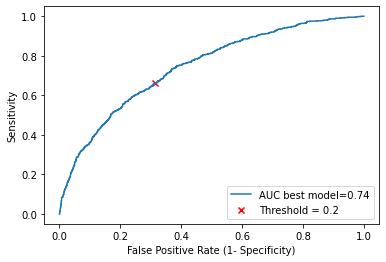

In [80]:
# Plot ROC and its AUC
plt.plot(fpr,
         tpr,
         label = "AUC best model="+str(auc))

plt.scatter(fpr[(threshold > 0.2) & (threshold < 0.2002)],
            tpr[(threshold > 0.2) & (threshold < 0.2002)],
            label = 'Threshold = 0.2',
            marker = 'x',
            color = 'r')

plt.ylabel("Sensitivity")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

Summary from ROC:
- If we choose `threshold = 0.2`, we will get:
  - False Positive Rate = 0.3
  - True Positive Rate (Sensitivity) = 0.65

- That means:
  - Memiliki probabilitas sebesar 30% untuk memprediksi pelanggan yang sebenarnya berhenti dengan tidak tepat. Untuk mencegah churn (seperti diskon atau insentif) mahal, threshold ini dapat mengurangi pemborosan untuk pelanggan yang tidak sebenarnya churn.
  - You need to discuss this number with the user (Product Team).
  - If the user is unhappy and wants a smaller probability of mispredicting the actual churners, you can change your threshold according to the ROC.
    - Note that we have a trade-off of a higher false positive rate when aiming for higher sensitivity.

## Interpret the Best Model Parameters
---

In [81]:
# recall model parameter
best_model_summary

,weights,OR
constant,-3.426826,0.032490
age,0.075273,1.078178
active_member,-1.094012,0.334870
balance,0.000005,1.000005
gender,-0.562855,0.569581
credit_score,-0.000964,0.999037


## Analisis Churn Pelanggan

**Apa saja prediktor yang meningkatkan probabilitas churn?**
- Ketika prediktor lain tetap konstan, penambahan nilai pada `usia` dan `saldo` menunjukkan peningkatan probabilitas churn.
- Artinya, ketika prediktor lain tetap konstan:
  - Penambahan **1 tahun** akan meningkatkan peluang churn hampir **8%**.
  - Penambahan **1 kegagalan layanan** akan meningkatkan peluang churn sekitar **0,0005%**.

**Bagaimana keanggotaan aktif memengaruhi probabilitas churn?**
- Jika pelanggan adalah anggota aktif, peluang mereka untuk churn akan berkurang sekitar **66,5%** dibandingkan dengan pelanggan yang tidak aktif.
- Aktivitas pelanggan adalah **faktor pelindung** terhadap churn.

**Bagaimana jenis kelamin memengaruhi probabilitas churn?**
- Jika pelanggan adalah perempuan (dengan asumsi kategori referensi adalah laki-laki), peluang mereka untuk churn akan berkurang sekitar **43%** dibandingkan dengan pelanggan laki-laki.
- **Pelanggan laki-laki** lebih mungkin untuk churn dibandingkan dengan pelanggan perempuan.

**Bagaimana skor kredit memengaruhi probabilitas churn?**
- Untuk setiap **peningkatan 1 poin** dalam skor kredit, peluang pelanggan untuk churn akan berkurang sebesar **0,096%**.
- Skor kredit yang lebih tinggi sedikit mengurangi kemungkinan churn pelanggan, meskipun dampaknya relatif kecil.